
## Web Scraping Roget's lexicon
We will start by scraping the lexicon with the BeautifulSoup library.

In [2]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from time import time

url = 'https://www.gutenberg.org/files/10681/old/20040627-10681-h-body-pos.htm#908'

page = requests.get(url)
page = page.content

soup = BeautifulSoup(page, 'html.parser')

We append the words of every row, and we update our lexicon when we find a Class or a Section/Division row

In [3]:
rows = soup.find_all('tr')

lexicon = pd.DataFrame(columns=['Class', 'Section/Division', 'Words'])

#initializations
cl = None
section = None
division = None
class_name = None
words = []

#identify the classes where their second level is section tier
classes_with_sections = ['CLASS I', 'CLASS II','CLASS III','CLASS VI']

#identify the classes where their second level is division tier
classes_with_divisions = ['CLASS IV','CLASS V']

for row in rows:
    if 'CLASS' in row.text:
        if cl is not None:
            if section is not None:
                lexicon = pd.concat([lexicon, pd.DataFrame({'Class': [cl], 'Section/Division': [section], 'Words': [words]})], ignore_index=True)
                section = None
            elif division is not None:
                lexicon = pd.concat([lexicon, pd.DataFrame({'Class': [cl], 'Section/Division': [division], 'Words': [words]})], ignore_index=True)
                division = None
                
        cl = row.text
        class_name = [part.strip() for part in cl.split('\n')]
        class_name = ' '.join(class_name[:2])
        continue
    #append the text for each case
    if class_name in classes_with_sections:
        if 'SECTION' in row.text:
            if section is not None:  
                lexicon = pd.concat([lexicon, pd.DataFrame({'Class': [cl], 'Section/Division': [section], 'Words': [words]})], ignore_index=True)
            section = row.text
            words = []
            continue
    elif class_name in classes_with_divisions:
        if 'DIVISION' in row.text:
            if division is not None:  
                lexicon = pd.concat([lexicon, pd.DataFrame({'Class': [cl], 'Section/Division': [division], 'Words': [words]})], ignore_index=True)
            division = row.text
            words = []
            continue

    #remove extra segmentations that represent a lower tier in the roget thesaurus lexicon
    if not row.text.isupper():
        words.append(row.text)
        
# store the scraped lexicon in a pandas dataframe
lexicon = lexicon = pd.concat([lexicon, pd.DataFrame({'Class': [cl], 'Section/Division': [section], 'Words': [words]})], ignore_index=True)
lexicon.head()

,Class,Section/Division,Words
0,CLASS\r\n I\nWORDS EXPRESSING ABSTRACT ...,SECTION\r\n I.\nEXISTENCE,[#1.\nExistence\r\n --\r\n N.\r\...
1,CLASS\r\n I\nWORDS EXPRESSING ABSTRACT ...,SECTION\r\n II.\nRELATION,[#9.\nRelation\r\n --\r\n N.\r\n...
2,CLASS\r\n I\nWORDS EXPRESSING ABSTRACT ...,SECTION\r\n III.\nQUANTITY,[#25.\n[Absolute quantity.]\nQuantity\r\n ...
3,CLASS\r\n I\nWORDS EXPRESSING ABSTRACT ...,SECTION\r\n IV.\nORDER,[#58.\nOrder\r\n --\r\n N.\r\nor...
4,CLASS\r\n I\nWORDS EXPRESSING ABSTRACT ...,SECTION\r\n V.\nNUMBER,[#84.\nNumber\r\n --\r\n N.\r\nn...


In [4]:
#preprocess class and section/division columns
def preprocess(text):
    text = ' '.join(text.split())  #remove unnecessary whitespaces
    return text.replace("\r\n", " ").replace("\n", " ") #remove \r\n and \n

lexicon['Class'] = lexicon['Class'].apply(preprocess)
lexicon['Section/Division'] = lexicon['Section/Division'].apply(preprocess)
lexicon

,Class,Section/Division,Words
0,CLASS I WORDS EXPRESSING ABSTRACT RELATIONS,SECTION I. EXISTENCE,[#1.\nExistence\r\n --\r\n N.\r\...
1,CLASS I WORDS EXPRESSING ABSTRACT RELATIONS,SECTION II. RELATION,[#9.\nRelation\r\n --\r\n N.\r\n...
2,CLASS I WORDS EXPRESSING ABSTRACT RELATIONS,SECTION III. QUANTITY,[#25.\n[Absolute quantity.]\nQuantity\r\n ...
3,CLASS I WORDS EXPRESSING ABSTRACT RELATIONS,SECTION IV. ORDER,[#58.\nOrder\r\n --\r\n N.\r\nor...
4,CLASS I WORDS EXPRESSING ABSTRACT RELATIONS,SECTION V. NUMBER,[#84.\nNumber\r\n --\r\n N.\r\nn...
5,CLASS I WORDS EXPRESSING ABSTRACT RELATIONS,SECTION VI. TIME,[#106.\nTime\r\n --\r\n N.\r\nti...
6,CLASS I WORDS EXPRESSING ABSTRACT RELATIONS,SECTION VII. CHANGE,[#140.\n[Difference at different times.]\nChan...
7,CLASS I WORDS EXPRESSING ABSTRACT RELATIONS,SECTION VIII. CAUSATION,[#153.\n[Constant antecedent].\nCause\r\n ...
8,CLASS II WORDS RELATING TO SPACE,SECTION I. SPACE IN GENERAL,[#180.\n[Indefinite space.]\nSpace\r\n ...
9,CLASS II WORDS RELATING TO SPACE,SECTION II. DIMENSIONS,[#192.\nSize\r\n --\r\n N.\r\nsi...


## Preprocessing lexicon 

**Main Tasks**

* Create the final lexicon at word level

* Remove "Phr" section of each header word since this section represents phrases

* Remove punctuations, numbers, extra spaces, parts of speech

* We will split each word using either **','** or **'.'**, but not with **';'** since this symbol is used to indicate a continuation of the previous word

In [5]:
class_list = []
section_list = []
word_list = []

rest_parts_of_speech = ['adj','adv','int']

for cl,sect,words in zip(lexicon['Class'],lexicon['Section/Division'],lexicon['Words']):
    for w in words:
        w = ' '.join(w.split())  # remove unnecessary whitespaces
        w = re.sub(r'\[.*?\]', '', w).strip() # remove everything in brackets []
        w = w.replace('&c','')  #common pattern for words that means "Et cetera"
        k = w.split('#') #split in 2 parts
        k = [item for item in k if item != ''] # remove empty elements of the k list
        for final in k:
            final = re.split(r'[,.]', final)  # split using ',' or '.' 
            for word in final:
                if 'Phr' in word:  # remove every word after 'Phr'
                    break
                    
                word = word.lower()
                word = re.sub(r'[^\w\s]', ' ', word) #remove punctuation
                word = re.sub(r'\s+', ' ', word).strip() # Removing extra spaces that may be left after replacements
                word = re.sub(r'\b\d+\b', '', word).strip()  # Remove sequences of digits
                
                # mainly to remove 'n' and 'v' for 'noun' and 'verb' respectively and the other parts of speech in the list
                if (len(word)<=1) or (word in rest_parts_of_speech): 
                    continue
                
                class_list.append(cl)
                section_list.append(sect)
                word_list.append(word)
    
                #print(word)

data = {'Class':class_list, 'Section/Division':section_list, 'Words': word_list}
preprocessed_lexicon = pd.DataFrame(data)
preprocessed_lexicon = preprocessed_lexicon.reset_index(drop=False).rename(columns={'index': 'id'})

In [6]:
preprocessed_lexicon.sample(5)

,id,Class,Section/Division,Words
30346,30346,CLASS IV WORDS RELATING TO THE INTELLECTUAL FA...,DIVISION I FORMATION OF IDEAS,speculation
10207,10207,CLASS I WORDS EXPRESSING ABSTRACT RELATIONS,SECTION VIII. CAUSATION,bring into existence breed
55726,55726,CLASS V WORDS RELATING TO THE VOLUNTARY POWERS,DIVISION II INTERSOCIAL VOLITION,meet with a loss miss mislay
49991,49991,CLASS V WORDS RELATING TO THE VOLUNTARY POWERS,DIVISION I INDIVIDUAL VOLITION,accommodate
6805,6805,CLASS I WORDS EXPRESSING ABSTRACT RELATIONS,SECTION VI. TIME,outlast


In [7]:
print(f'Our lexicon contains {preprocessed_lexicon.shape[0]} words')

Our lexicon contains 73715 words


## Analysis across Class & Section/Division level

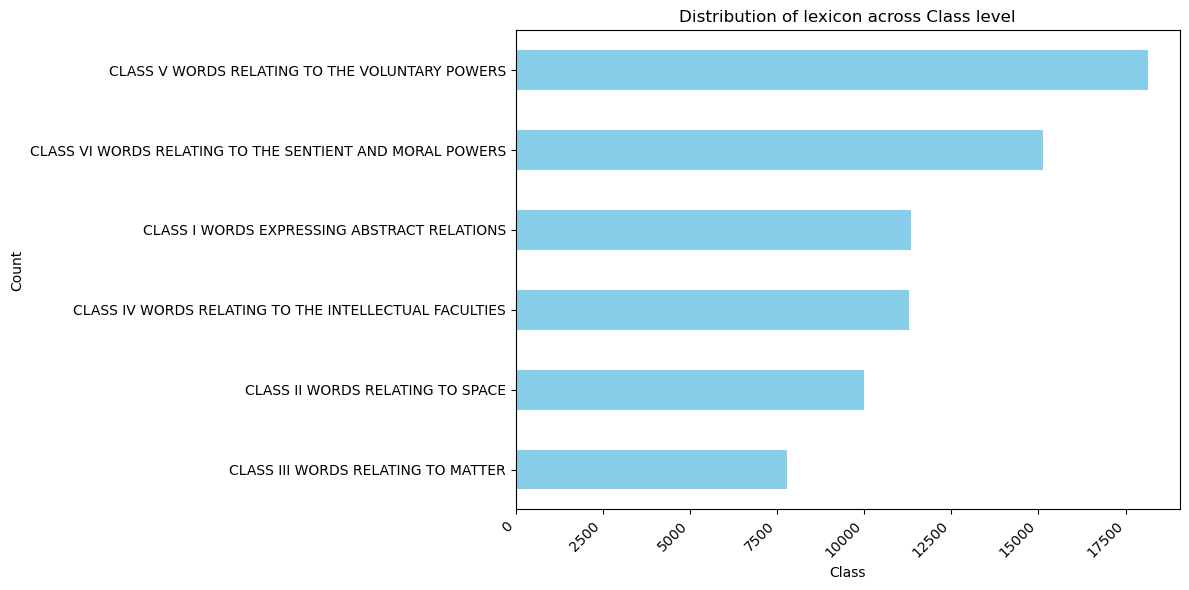

In [7]:
class_counts = preprocessed_lexicon["Class"].value_counts().sort_values(ascending=True)

plt.figure(figsize=(12, 6))
class_counts.plot(kind='barh', color='skyblue')
plt.title('Distribution of lexicon across Class level')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

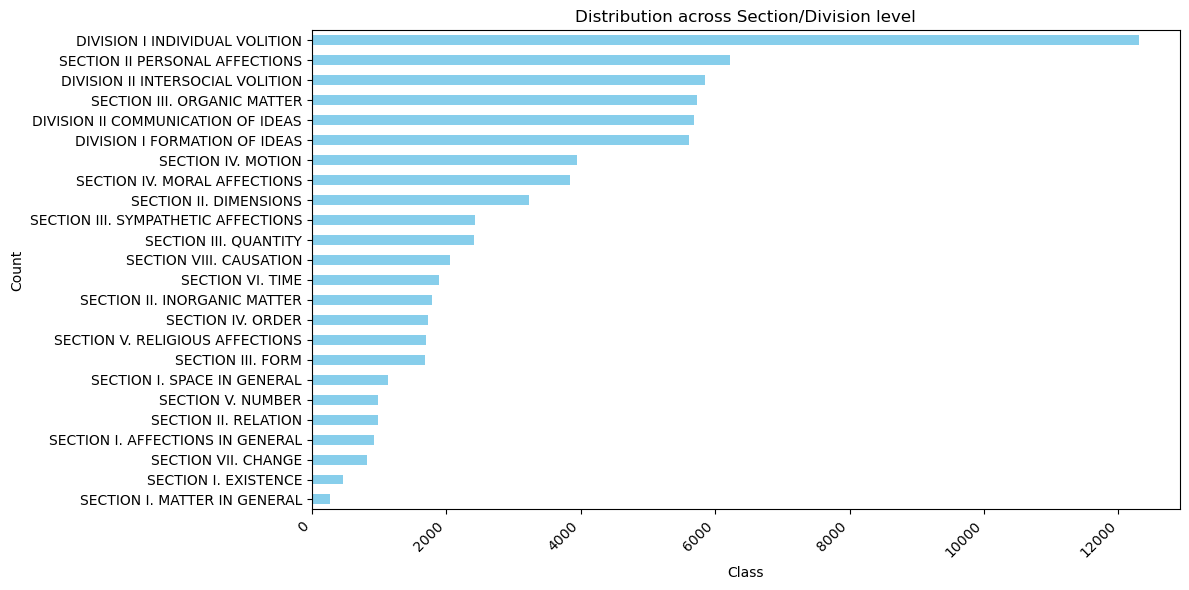

In [8]:
class_counts = preprocessed_lexicon["Section/Division"].value_counts().sort_values(ascending=True)

plt.figure(figsize=(12, 6))
class_counts.plot(kind='barh', color='skyblue')
plt.title('Distribution across Section/Division level')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

With these plots, we observe that our lexicon is highly imbalanced, with **Class V** containing the richest vocabulary. This derives by the **"Individual Volition"** division which is the most populated subclass. There are also sections with  very limited vocabulary representation. Subsequently, a machine learning model may encounter challenges in accurately predicting classes and sections characterized by notably sparse vocabulary representations.

## Generate Word Embeddings

In [9]:
import csv
import os
import ast

### Open AI API

In [7]:
import tiktoken
import openai

openai.api_key = 'API_KEY'

We will export each embedding into its **own CSV file**. This ensures that we do not lose our progress in the event of an error, such as a network error, and avoids the need to start over from the beginning.

In [47]:
# store the embeddings in "embeddings_dataset" folder
dataset_folder = 'embeddings_dataset/OpenAI_Embeddings'
if not os.path.exists(dataset_folder):
    os.makedirs(dataset_folder)


tic = time()
i = 0
ticc = time()

for word in preprocessed_lexicon['Words'][i:]:
    if i % 500 == 0:
        print('Word:', i)
        tocc = time()
        print(f'Time for 500 embeddings: {round(tocc - ticc, 2)} seconds') #to provide an update of the process
        ticc = time()
    i += 1
    
    response = openai.Embedding.create(
        model="text-embedding-3-small",
        input=word
    )
    
    embedding = response.data[0]['embedding']
    
    # save each embedding to a separate CSV file
    embedding_filename = os.path.join(dataset_folder, f'{i}.csv')
    with open(embedding_filename, mode='w', newline='') as file:
        writer = csv.writer(file)
        writer.writerow(['Word', 'Embedding'])
        writer.writerow([word, embedding])
        
toc = time()

print(f'Total time: {round(toc - tic, 2)} seconds')

Word: 48500
Time for 500 embeddings: 115.88 seconds
Word: 49000
Time for 500 embeddings: 213.73 seconds
Word: 49500
Time for 500 embeddings: 199.84 seconds
Word: 50000
Time for 500 embeddings: 203.4 seconds
Word: 50500
Time for 500 embeddings: 202.68 seconds
Word: 51000
Time for 500 embeddings: 201.13 seconds
Word: 51500
Time for 500 embeddings: 215.13 seconds
Word: 52000
Time for 500 embeddings: 192.33 seconds
Word: 52500
Time for 500 embeddings: 197.79 seconds
Word: 53000
Time for 500 embeddings: 193.94 seconds
Word: 53500
Time for 500 embeddings: 188.37 seconds
Word: 54000
Time for 500 embeddings: 211.43 seconds
Word: 54500
Time for 500 embeddings: 231.32 seconds
Word: 55000
Time for 500 embeddings: 223.1 seconds
Word: 55500
Time for 500 embeddings: 234.68 seconds
Word: 56000
Time for 500 embeddings: 293.71 seconds
Word: 56500
Time for 500 embeddings: 235.44 seconds
Word: 57000
Time for 500 embeddings: 209.07 seconds
Word: 57500
Time for 500 embeddings: 196.54 seconds
Word: 58000
Ti

KeyboardInterrupt: 

After receiving the embeddings from OpenAI API, the next step is to merge each separate file, into one dataframe and save it

In [58]:
all_words = []
all_embeddings = []
for i in range(1, len(all_words) + 1): #73715 total words in our lexicon
    filename = pd.read_csv(f'embeddings_dataset/OpenAI_Embeddings/{i}.csv')
    all_words.append(filename['Word'][0])
    all_embeddings.append(filename['Embedding'][0])

In [36]:
data = {'Word': all_words, 'Embedding': all_embeddings}
openai_embeddings = pd.DataFrame(data)

openai_embeddings = openai_embeddings.reset_index(drop=False).rename(columns={'index':'id'})

In [153]:
# our embeddings now are stored as string representations so we have to convert them to actual lists
openai_embeddings['Embedding'] = openai_embeddings['Embedding'].apply(ast.literal_eval)

In [154]:
final_file = 'openai_embeddings.json'

openai_embeddings.to_json(final_file, orient='records', lines=True)
print(f'All embeddings saved successfully in {final_file}')

All embeddings saved successfully in openai_embeddings.json


### Mxbai Emebeddings

We can also follow a completely free option to create embeddings using the open-source [mxbai-embed-large-v1](https://huggingface.co/mixedbread-ai/mxbai-embed-large-v1) model that achieves great results in  [MTEB leaderboard](https://huggingface.co/spaces/mteb/leaderboard). We apply the same methodology as with the OpenAI embeddings.

In [10]:
from sentence_transformers import SentenceTransformer
model_mxbai = SentenceTransformer("mixedbread-ai/mxbai-embed-large-v1")

C:\Users\CFRAGKIADAKIS\Anaconda3\lib\site-packages\transformers\utils\generic.py:441: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(
C:\Users\CFRAGKIADAKIS\Anaconda3\lib\site-packages\transformers\utils\generic.py:309: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(


In [37]:
# store the embeddings in "embeddings_dataset" folder
dataset_folder = 'embeddings_dataset/Mxbai_Embeddings'

if not os.path.exists(dataset_folder):
    os.makedirs(dataset_folder)

tic = time()

i = 2629

ticc = time()

for word in preprocessed_lexicon['Words'][i:37000]:
    if i % 500 == 0:
        print('Word:', i)
        tocc = time()
        print(f'Time for 500 embeddings: {round(tocc - ticc, 2)} seconds') #to provide an update of the process
        ticc = time()
    i += 1
    
    embedding = model_mxbai.encode(word)
    embedding = embedding.tolist()
    
    # save each embedding to a separate CSV file
    embedding_filename = os.path.join(dataset_folder, f'{i}.csv')
    
    with open(embedding_filename, mode='w', newline='') as file:
        writer = csv.writer(file)
        writer.writerow(['Word', 'Embedding'])
        writer.writerow([word, embedding])
        
toc = time()

print(f'Total time: {round(toc - tic, 2)} seconds')

Word: 3000
Time for 500 embeddings: 61.68 seconds
Word: 3500
Time for 500 embeddings: 87.19 seconds
Word: 4000
Time for 500 embeddings: 132.86 seconds
Word: 4500
Time for 500 embeddings: 130.84 seconds
Word: 5000
Time for 500 embeddings: 127.32 seconds
Word: 5500
Time for 500 embeddings: 131.46 seconds
Word: 6000
Time for 500 embeddings: 130.13 seconds
Word: 6500
Time for 500 embeddings: 214.37 seconds
Word: 7000
Time for 500 embeddings: 148.89 seconds
Word: 7500
Time for 500 embeddings: 160.02 seconds
Word: 8000
Time for 500 embeddings: 260.19 seconds
Word: 8500
Time for 500 embeddings: 499.37 seconds
Word: 9000
Time for 500 embeddings: 373.59 seconds
Word: 9500
Time for 500 embeddings: 303.65 seconds
Word: 10000
Time for 500 embeddings: 308.69 seconds
Word: 10500
Time for 500 embeddings: 261.52 seconds
Word: 11000
Time for 500 embeddings: 231.65 seconds
Word: 11500
Time for 500 embeddings: 219.87 seconds
Word: 12000
Time for 500 embeddings: 198.71 seconds
Word: 12500
Time for 500 emb

In [38]:
all_words = []
all_embeddings = []
for i in range(1, len(all_words) + 1): #73715 total words in our lexicon
    filename = pd.read_csv(f'embeddings_dataset/Mxbai_Embeddings/{i}.csv')
    all_words.append(filename['Word'][0])
    all_embeddings.append(filename['Embedding'][0])
    
    
data = {'Word':all_words, 'Embedding':all_embeddings}
mxbai_embeddings = pd.DataFrame(data)

mxbai_embeddings = mxbai_embeddings.reset_index(drop=False).rename(columns={'index':'id'})

In [40]:
# our embeddings now are stored as string representations so we have to convert them to actual lists
mxbai_embeddings['Embedding'] = mxbai_embeddings['Embedding'].apply(ast.literal_eval)

In [43]:
final_file = 'mxbai_embeddings.json'

mxbai_embeddings.to_json(final_file, orient='records', lines=True)
print(f'All embeddings saved successfully in {final_file}')

All embeddings saved successfully in mxbai_embeddings.json


## Clustering

In [7]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.metrics import classification_report

Since the embeddings generated by the OpenAI API yield better results for the following tasks, we will no longer use the mxbai embeddings

In [8]:
openai_embeddings = pd.read_json('openai_embeddings.json', lines=True)

Firstly, we observe that the same word can appear in multiple classes. For this reason, we will keep only one occurrence of this word.

In [9]:
lexicon_embeddings = preprocessed_lexicon.drop_duplicates('Words').merge(openai_embeddings[['id','Embedding']], on='id')

In [14]:
#map each class with an integer
def map_class(row):
    if row == 'CLASS I WORDS EXPRESSING ABSTRACT RELATIONS':
        return 0
    elif row == 'CLASS II WORDS RELATING TO SPACE':
        return 1
    elif row == 'CLASS III WORDS RELATING TO MATTER':
        return 2
    elif row == 'CLASS IV WORDS RELATING TO THE INTELLECTUAL FACULTIES':
        return 3
    elif row == 'CLASS V WORDS RELATING TO THE VOLUNTARY POWERS':
        return 4
    else:
        return 5
    
lexicon_embeddings['Class_Mapped'] = lexicon_embeddings['Class'].apply(map_class)    

In [11]:
#map each section/division level with an integer, similarly to class level
second_level = set(lexicon_embeddings['Section/Division'])
second_level_mapping = {}
i=0
for section in second_level:
    second_level_mapping[section] = i
    i+=1
    
lexicon_embeddings['Section/Division_Mapped'] = lexicon_embeddings['Section/Division'].map(second_level_mapping)

In [12]:
lexicon_embeddings.shape

(57438, 7)

In [13]:
#initialize the embeddings that we will use for clustering
clustering_embeddings = np.array(lexicon_embeddings['Embedding'].tolist())

# store the true labels in a variable, in order to compare the performance of the following algorithms with Roget's Classification
true_labels = lexicon_embeddings['Class_Mapped']

## Representation of Roget's Classification

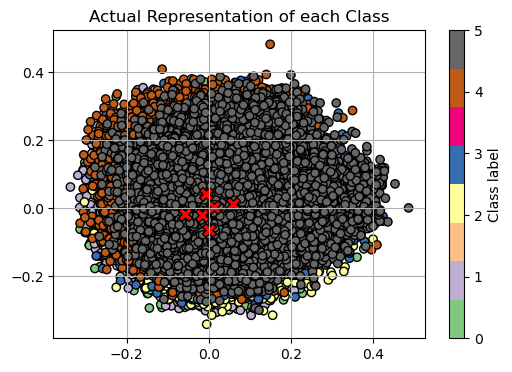

In [18]:
pca = PCA(n_components=2)
embeddings_transformed = pca.fit_transform(clustering_embeddings)

unique_labels = np.unique(true_labels)
centroids = np.array([embeddings_transformed[true_labels == label].mean(axis=0) for label in unique_labels])

plt.figure(figsize=(6, 4))
scatter = plt.scatter(x=embeddings_transformed[:,0], y=embeddings_transformed[:,1], c=true_labels, 
            edgecolor='k', cmap='Accent')

for i, centroid in enumerate(centroids):
    plt.scatter(centroid[0], centroid[1], c='red', marker='X', edgecolor='k', s=100)

plt.title('Actual Representation of each Class')
plt.grid(visible=True)
plt.colorbar(scatter, label='Class label')
plt.show()

**Observing the Roget's actual representation of each class using PCA, the scatter plot suggests that the data points are not clearly separable into distinct clusters, at least not in the dimensionality that is being visualized. It would be very difficult to find a clustering algorithm that could implement a clustering, similar to Roget's.**

## K-Means

In [21]:
kmeans = KMeans(n_clusters=6, random_state=42)
cluster_labels = kmeans.fit_predict(clustering_embeddings)

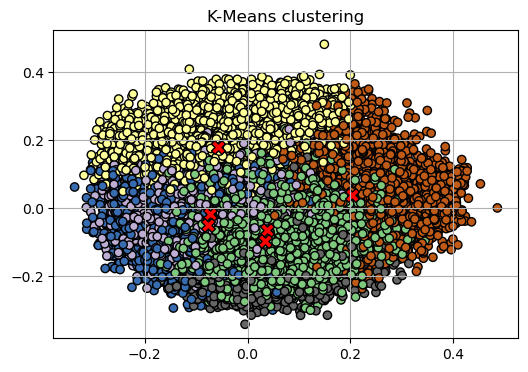

In [22]:
#perform PCA to centroids so we can visualize them also
centroids_transformed = pca.transform(kmeans.cluster_centers_)

plt.figure(figsize=(6, 4))
plt.scatter(x=embeddings_transformed[:,0], y=embeddings_transformed[:,1], c=kmeans.labels_, 
            edgecolor='k', cmap='Accent')

for idx, centroid in enumerate(centroids_transformed):
    plt.scatter(centroid[0], centroid[1], marker='X', s=100, c='red',  edgecolor='k')

plt.title('K-Means clustering')
plt.grid(visible=True)

In [23]:
# Evaluate clustering using Adjusted Rand Index (ARI)
ari = adjusted_rand_score(true_labels, cluster_labels)
print("Adjusted Rand Index (ARI):", ari)

Adjusted Rand Index (ARI): 0.0449777247081171


In [24]:
print(classification_report(true_labels,kmeans.labels_))

              precision    recall  f1-score   support

           0       0.12      0.10      0.11      9949
           1       0.27      0.38      0.31      8018
           2       0.06      0.09      0.07      6294
           3       0.20      0.25      0.22      8940
           4       0.27      0.16      0.20     13444
           5       0.13      0.11      0.12     10793

    accuracy                           0.18     57438
   macro avg       0.17      0.18      0.17     57438
weighted avg       0.18      0.18      0.17     57438



## K-Means using Standard Scaler

In [25]:
standard_scaler = StandardScaler()
embeddings_scaled = standard_scaler.fit_transform(clustering_embeddings)
kmeans = KMeans(n_clusters=6, random_state=42).fit(embeddings_scaled)

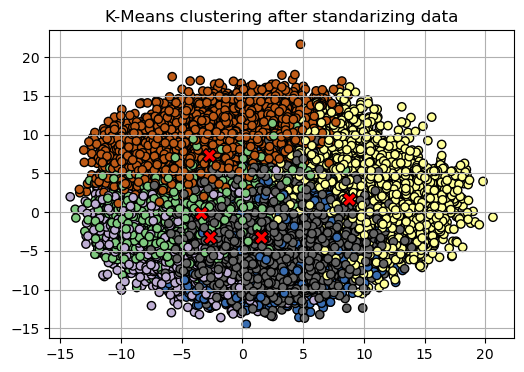

In [99]:
pca = PCA(n_components=2)
embeddings_transformed = pca.fit_transform(embeddings_scaled)

#perform PCA to centroids so we can visualize them also
centroids_transformed = pca.transform(kmeans.cluster_centers_)

plt.figure(figsize=(6, 4))
plt.scatter(x=embeddings_transformed[:,0], y=embeddings_transformed[:,1], c=kmeans.labels_, 
            edgecolor='k', cmap='Accent')

for idx, centroid in enumerate(centroids_transformed):
    plt.scatter(centroid[0], centroid[1], marker='X', s=100, c='red',  edgecolor='k')
    
plt.title('K-Means clustering after standarizing data')
plt.grid(visible=True)

In [97]:
cluster_labels = kmeans.fit_predict(embeddings_scaled)

# evaluate clustering using Adjusted Rand Index (ARI)
ari = adjusted_rand_score(true_labels, cluster_labels)
print("Adjusted Rand Index (ARI):", ari)

Adjusted Rand Index (ARI): 0.044440073597767686


In [26]:
print(classification_report(true_labels,kmeans.labels_))

              precision    recall  f1-score   support

           0       0.11      0.12      0.11      9949
           1       0.13      0.18      0.15      8018
           2       0.04      0.05      0.05      6294
           3       0.10      0.09      0.10      8940
           4       0.32      0.24      0.28     13444
           5       0.40      0.29      0.33     10793

    accuracy                           0.18     57438
   macro avg       0.18      0.16      0.17     57438
weighted avg       0.21      0.18      0.19     57438



## Gaussian Mixture

Since this approach requires too many computational resources, we will use directly PCA before applying it.
We will find the number of components, which will give us 80% of variance.

Number of components to explain 80% of variance: 263


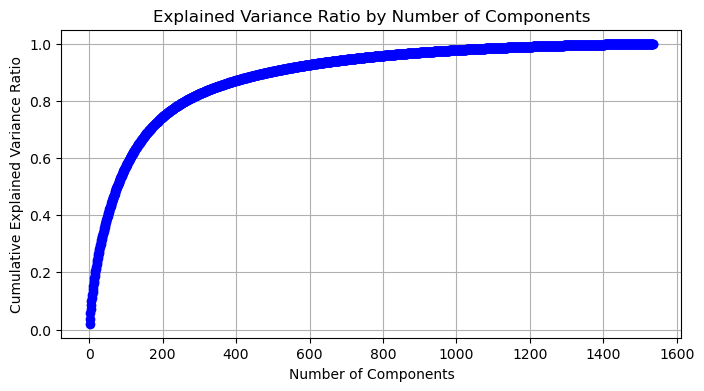

In [67]:
pca = PCA()
pca.fit(clustering_embeddings)

cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

n_components = np.argmax(cumulative_variance >= 0.8) + 1

print("Number of components to explain 80% of variance:", n_components)

plt.figure(figsize=(8, 4))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='-', color='b')
plt.title('Explained Variance Ratio by Number of Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.grid(True)

plt.show()

In [29]:
pca = PCA(n_components=263)
embeddings_transformed = pca.fit_transform(clustering_embeddings)

gmm = GaussianMixture(n_components=6, covariance_type='full', max_iter=100, random_state=42)
cluster_assignment = gmm.fit_predict(embeddings_transformed)

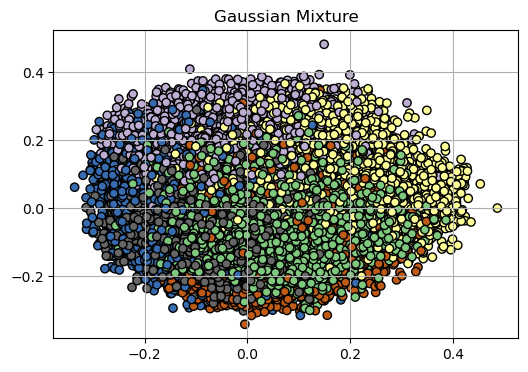

In [30]:
plt.figure(figsize=(6, 4))
plt.scatter(x=embeddings_transformed[:,0], y=embeddings_transformed[:,1], c=cluster_assignment, edgecolor='k', cmap='Accent')

plt.title('Gaussian Mixture')
plt.grid(visible=True)

In [31]:
ari = adjusted_rand_score(true_labels, cluster_assignment)
print("Adjusted Rand Index (ARI):", ari)

Adjusted Rand Index (ARI): 0.05494666133662943


In [32]:
print(classification_report(true_labels,cluster_assignment))

              precision    recall  f1-score   support

           0       0.12      0.11      0.12      9949
           1       0.16      0.18      0.17      8018
           2       0.03      0.04      0.03      6294
           3       0.24      0.25      0.24      8940
           4       0.13      0.10      0.11     13444
           5       0.14      0.14      0.14     10793

    accuracy                           0.14     57438
   macro avg       0.14      0.14      0.13     57438
weighted avg       0.14      0.14      0.14     57438



Observing the results of all the models, it appears that there is no algorithm that can arrive at classifications that are comparable to the Roget's Thesaurus Classification.

K-Means clustering with standardized data seems to be the model that achieves the best results, mainly for the last class (the second most frequent) with high precision, compared to the rest algorithms. However, these clusters are still very far compared to the classification of Roget's.

Additional metrics could be reviewed, but we already understand that we cannot come up with clusters similar to Roget's.

In [13]:
from sklearn.linear_model import SGDClassifier,LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier,VotingClassifier, BaggingClassifier
from sklearn.metrics import accuracy_score,recall_score,f1_score,roc_auc_score, confusion_matrix
from sklearn.model_selection import cross_val_score, GridSearchCV
import xgboost as xgb
import lightgbm as lgb
import seaborn as sns
import joblib

## Class Prediction

We will create a function on which we will give the embeddings dataframe along with the label we want to predict (class or section / division), and we will get in return the training,validation and testing datasets. We will ensure that the datasets will have the same representation of each class.

In [14]:
def split_dataset(df):
    df = df.reset_index()
    
    np.random.seed(0)  #set random seed for reproducibility
    df = df.reindex(np.random.permutation(df.index))
    
    np.bincount(df['Class_Mapped'].values)
    
    total = df.shape[0]
    
    # sizes for training, validation, testing
    training_shape = int(total * 0.8)
    val_shape = int(total * 0.1)
    test_shape = int(total * 0.1)

    #calculate the class distribution, to ensure that the 3 datasets will have similar percentages
    percentages = df['Class'].value_counts(normalize=True).values
    labels = df['Class'].value_counts().index
    sets = [training_shape, val_shape, test_shape]
    
    dataframes = []  

    for temp_set, l in zip(sets, ['training', 'validation', 'testing']):
        num_of_rows = []
        for index, num in enumerate(percentages):
            expected_rows = int((temp_set * num)) #find the number of rows we need to achieve each percentage
            num_of_rows.append(expected_rows)
        result_dict = dict(zip(labels, num_of_rows))
        
        sampled_df = pd.DataFrame()

        for label, num in result_dict.items():
            temp_df = df[df['Class'] == label].sample(n=num, replace=False, random_state=42)
            sampled_df = pd.concat([sampled_df, temp_df])

        sampled_df.reset_index(drop=True, inplace=True) 
        
        #Remove the selected rows from the original dataframe
        df = df[~df['index'].isin(set(sampled_df['index']))]

        #if there are remaining rows, add them to the testing set
        if l == 'testing' and df.shape[0] != 0:
            sampled_df = pd.concat([sampled_df, df])

        print(sampled_df.shape)
        
        sampled_df = sampled_df[["index", "Class",'Class_Mapped', "Section/Division","Section/Division_Mapped","Words", "Embedding"]]
        dataframes.append(sampled_df)  

    return dataframes

We have ensured the equal distribution of each class for the 3 datasets

In [15]:
classification_embeddings = lexicon_embeddings.copy()

In [16]:
df_train, df_val, df_test = split_dataset(classification_embeddings)

(45948, 8)
(5740, 8)
(5750, 8)


In [17]:
df_train['Class'].value_counts(normalize=True)

CLASS V WORDS RELATING TO THE VOLUNTARY POWERS              0.234069
CLASS VI WORDS RELATING TO THE SENTIENT AND MORAL POWERS    0.187908
CLASS I WORDS EXPRESSING ABSTRACT RELATIONS                 0.173218
CLASS IV WORDS RELATING TO THE INTELLECTUAL FACULTIES       0.155632
CLASS II WORDS RELATING TO SPACE                            0.139593
CLASS III WORDS RELATING TO MATTER                          0.109580
Name: Class, dtype: float64

In [18]:
df_val['Class'].value_counts(normalize=True)

CLASS V WORDS RELATING TO THE VOLUNTARY POWERS              0.234146
CLASS VI WORDS RELATING TO THE SENTIENT AND MORAL POWERS    0.187979
CLASS I WORDS EXPRESSING ABSTRACT RELATIONS                 0.173171
CLASS IV WORDS RELATING TO THE INTELLECTUAL FACULTIES       0.155575
CLASS II WORDS RELATING TO SPACE                            0.139547
CLASS III WORDS RELATING TO MATTER                          0.109582
Name: Class, dtype: float64

In [19]:
df_test['Class'].value_counts(normalize=True)

CLASS V WORDS RELATING TO THE VOLUNTARY POWERS              0.233913
CLASS VI WORDS RELATING TO THE SENTIENT AND MORAL POWERS    0.187826
CLASS I WORDS EXPRESSING ABSTRACT RELATIONS                 0.173217
CLASS IV WORDS RELATING TO THE INTELLECTUAL FACULTIES       0.155826
CLASS II WORDS RELATING TO SPACE                            0.139652
CLASS III WORDS RELATING TO MATTER                          0.109565
Name: Class, dtype: float64

In [17]:
#convert into array of lists the embeddings for training,validation and testing dataset
X_train = np.array([np.array(embedding) for embedding in df_train["Embedding"]])
y_train = np.array(df_train["Class_Mapped"])

X_val = np.array([np.array(embedding) for embedding in df_val["Embedding"]])
y_val = np.array(df_val["Class_Mapped"])

X_test = np.array([np.array(embedding) for embedding in df_test["Embedding"]])
y_test = np.array(df_test["Class_Mapped"])

We will try to find the most suitable model for this task, without looking right now for hyperparameters

In [69]:
#store the results of each estimator in each dataset
metrics_training = {}
metrics_validation ={}
metrics_testing = {}

estimators = [LogisticRegression(random_state=42),
              RandomForestClassifier(random_state=42),
              SGDClassifier(random_state=42),
              xgb.XGBClassifier(random_state=42),
              lgb.LGBMClassifier(random_state=42),
              GaussianNB()
              ]

for estimator in estimators:
    print('Processing estimator: ', estimator)
    print('\n')

    tic = time()
    
    print('Training:')
    
    #fit training set
    estimator.fit(X_train, y_train)
    
        
    # Predict on the training set
    training_predictions = estimator.predict(X_train)
    
    print('Training Accuracy: ', round(accuracy_score(y_train, training_predictions),2))
    print('\n')

    toc = time()
    
    #append results in training dataset
    metrics_training[str(estimator).split('(')[0]] = {
    'accuracy':round(accuracy_score(y_train, training_predictions),2),
    'macro f1':round(f1_score(y_train, training_predictions, average='macro'),2),
    'recall':round(recall_score(y_train, training_predictions,average='macro'),2),
    'fit time(sec)':round(toc - tic,2)
    }

    print('Validation: ')
    
    # Predict on the validation set
    validation_predictions = estimator.predict(X_val)
        
    print('Validation Accuracy: ',round(accuracy_score(y_val, validation_predictions),2))
    print('\n')

    #append results in validation dataset. fit time is not useful information for validation and test dataset
    metrics_validation[str(estimator).split('(')[0]] = {
    'accuracy':round(accuracy_score(y_val, validation_predictions),2),
    'macro f1':round(f1_score(y_val, validation_predictions, average='macro'),2),
    'recall':round(recall_score(y_val, validation_predictions,average='macro'),2)}
    
    
    print('Testing: ')

    #predict on testing set
    predictions = estimator.predict(X_test)
    
    print('Testing Accuracy: ',round(accuracy_score(y_test, predictions),2))
    print('\n')
    
    #append results in testing dataset
    metrics_testing[str(estimator).split('(')[0]] = {
        'accuracy':round(accuracy_score(y_test, predictions),2),
        'macro f1':round(f1_score(y_test, predictions, average='macro'),2),
        'recall':round(recall_score(y_test, predictions,average='macro'),2)}
    
metrics_training = pd.DataFrame(metrics_training)
metrics_validation = pd.DataFrame(metrics_validation)    
metrics_testing = pd.DataFrame(metrics_testing)

Processing estimator:  LogisticRegression(random_state=42)


Training:


C:\Users\CFRAGKIADAKIS\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training Accuracy:  0.61


Validation: 
Validation Accuracy:  0.6


Testing: 
Testing Accuracy:  0.59


Processing estimator:  RandomForestClassifier(random_state=42)


Training:
Training Accuracy:  1.0


Validation: 
Validation Accuracy:  0.52


Testing: 
Testing Accuracy:  0.53


Processing estimator:  SGDClassifier(random_state=42)


Training:
Training Accuracy:  0.6


Validation: 
Validation Accuracy:  0.59


Testing: 
Testing Accuracy:  0.58


Processing estimator:  XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_d

In [70]:
metrics_training

,LogisticRegression,RandomForestClassifier,SGDClassifier,XGBClassifier,LGBMClassifier,GaussianNB
accuracy,0.61,1.00,0.60,0.98,0.82,0.54
macro f1,0.61,1.00,0.60,0.98,0.82,0.54
recall,0.61,1.00,0.60,0.98,0.82,0.55
fit time(sec),22.28,212.29,17.67,585.93,295.39,7.08


In [71]:
metrics_validation

,LogisticRegression,RandomForestClassifier,SGDClassifier,XGBClassifier,LGBMClassifier,GaussianNB
accuracy,0.60,0.52,0.59,0.59,0.58,0.55
macro f1,0.59,0.51,0.59,0.58,0.58,0.55
recall,0.59,0.50,0.59,0.58,0.58,0.56


In [72]:
metrics_testing

,LogisticRegression,RandomForestClassifier,SGDClassifier,XGBClassifier,LGBMClassifier,GaussianNB
accuracy,0.59,0.53,0.58,0.59,0.58,0.53
macro f1,0.59,0.52,0.58,0.59,0.58,0.53
recall,0.59,0.50,0.58,0.58,0.58,0.54


Based on these results, the most suitable model for this task appears to be **Logistic Regression**, with **SGD Classifier** and **LGBM Classifier** achieving comparable results

### Hyperparameter tuning with BayesSearchCV

In [18]:
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer
from sklearn.model_selection import StratifiedKFold

### Logistic Regression

For logistic regression, since not all of the solvers support penalty 'l1' we modify the search space and iterate to find the best hyperparameters for each

In [59]:
search_spaces = {
    'liblinear': {
        'C': Real(0.001, 10.0, prior='log-uniform'),
        'penalty': Categorical(['l1', 'l2']),
        'solver': Categorical(['liblinear'])
    },
    'lbfgs': {
        'C': Real(0.001, 10.0, prior='log-uniform'),
        'penalty': Categorical(['l2']),
        'solver': Categorical(['lbfgs'])
    },
    'saga': {
        'C': Real(0.001, 10.0, prior='log-uniform'),
        'penalty': Categorical(['l1', 'l2']),
        'solver': Categorical(['saga'])
    },
    'newton-cg': {
        'C': Real(0.001, 10.0, prior='log-uniform'),
        'penalty': Categorical(['l2']),
        'solver': Categorical(['newton-cg'])
    }
}


def run_optimization(search_space):
    opt = BayesSearchCV(
        estimator=LogisticRegression(max_iter=1000, random_state=42),
        search_spaces=search_space,
        n_iter=30,  
        scoring='accuracy',
        n_jobs=-1,
        cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    )
    opt.fit(X_train, y_train)
    return opt.best_params_, opt.best_score_

results = {}
for solver, space in search_spaces.items():
    best_params, best_score = run_optimization(space)
    results[solver] = {'Best Parameters': best_params, 'Best Accuracy': best_score}

for solver, result in results.items():
    print(f"Results for {solver}:")
    print("Best Hyperparameters:", result['Best Parameters'])
    print("Best Accuracy:", result['Best Accuracy'])
    print("\n")

Results for liblinear:
Best Hyperparameters: OrderedDict([('C', 6.810594364990655), ('penalty', 'l2'), ('random_state', 42), ('solver', 'liblinear')])
Best Accuracy: 0.588077882304989


Results for lbfgs:
Best Hyperparameters: OrderedDict([('C', 1.8035837871991047), ('penalty', 'l2'), ('random_state', 42), ('solver', 'lbfgs')])
Best Accuracy: 0.5865761198367115


Results for saga:
Best Hyperparameters: OrderedDict([('C', 1.6768820402833384), ('penalty', 'l2'), ('random_state', 42), ('solver', 'saga')])
Best Accuracy: 0.5864890757992212


Results for newton-cg:
Best Hyperparameters: OrderedDict([('C', 1.8475522302881706), ('penalty', 'l2'), ('random_state', 42), ('solver', 'newton-cg')])
Best Accuracy: 0.5866196572497443




In [45]:
log_clf = LogisticRegression(random_state=42, C=6.810594364990655, solver ='liblinear', penalty='l2')
log_clf.fit(X_train, y_train)

train_acc = log_clf.score(X_train, y_train)
val_acc = log_clf.score(X_val, y_val)
test_acc = log_clf.score(X_test, y_test)
y_pred = log_clf.predict(X_test)

print(f"- Training accuracy: {train_acc:.2f} | Validation accuracy: {val_acc:.2f} | Testing accuracy: {test_acc:.2f}")
print(classification_report(y_test, y_pred))

- Training accuracy: 0.63 | Validation accuracy: 0.60 | Testing accuracy: 0.60
              precision    recall  f1-score   support

           0       0.60      0.59      0.59       996
           1       0.56      0.58      0.57       803
           2       0.62      0.58      0.60       630
           3       0.63      0.61      0.62       896
           4       0.59      0.61      0.60      1345
           5       0.62      0.61      0.62      1080

    accuracy                           0.60      5750
   macro avg       0.60      0.60      0.60      5750
weighted avg       0.60      0.60      0.60      5750



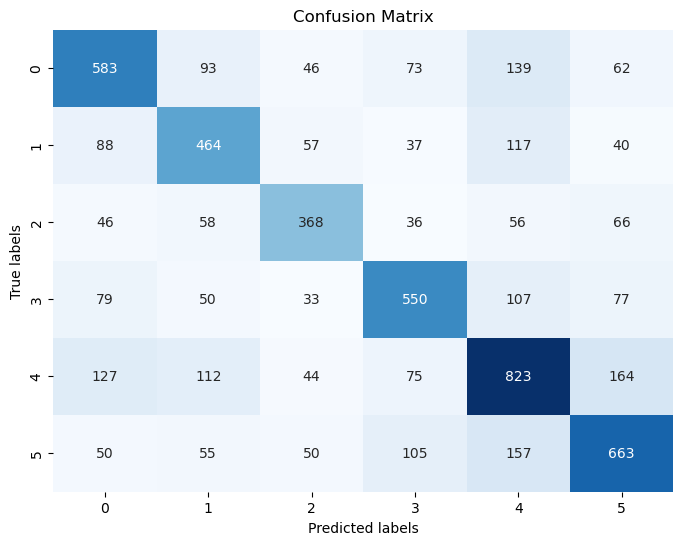

In [48]:
y_pred = log_clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix")
plt.show()

### LGBM Classifier

In [20]:
search_space = {
    'learning_rate': Real(0.01, 0.3, 'log-uniform'),
    'num_leaves': Integer(40, 800),
    'max_depth': Integer(1, 20),
    'n_estimators': Integer(50, 800),
    'min_child_samples': Integer(1, 20),
}

lgb_classifier = lgb.LGBMClassifier(objective='multiclass', num_class=6, metric='multi_logloss')

#n_iter and cv parameters can be increased if we have the necessary computational resources
opt = BayesSearchCV(lgb_classifier, search_space, n_iter=10, cv=3, n_jobs=-1, verbose=1)

opt.fit(X_train, y_train)

best_lgb_params = opt.best_params_

print('Best lgm hyperparameters', best_lgb_params)

Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 1.092997 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 391680
[LightGBM] [Info] Number of data points in the train set: 45948, number of used features: 1536
[LightGBM] [Info] Start training from score -1.753207
[LightGBM] [Info] Start training from score -1.969027
[LightGBM

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

In [21]:
print(best_lgb_params)

OrderedDict([('learning_rate', 0.16688427557504074), ('max_depth', 10), ('min_child_samples', 12), ('n_estimators', 676), ('num_leaves', 121)])


In [22]:
lgb_classifier = lgb.LGBMClassifier(objective='multiclass', num_class=6, metric='multi_logloss', **best_lgb_params)

lgb_classifier.fit(X_train, y_train)

y_pred = lgb_classifier.predict(X_test)

train_acc = lgb_classifier.score(X_train, y_train)
val_acc = lgb_classifier.score(X_val, y_val)
test_acc = lgb_classifier.score(X_test, y_test)
y_pred = lgb_classifier.predict(X_test)

print('\n')
print(f"- Training accuracy: {train_acc:.2f} | Validation accuracy: {val_acc:.2f} | Testing accuracy: {test_acc:.2f}")
print(classification_report(y_test, y_pred))

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.924816 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 391680
[LightGBM] [Info] Number of data points in the train set: 45948, number of used features: 1536
[LightGBM] [Info] Start training from score -1.753207
[LightGBM] [Info] Start training from score -1.969027
[LightGBM] [Info] Start training from score -2.211097
[LightGBM] [Info] Start training from score -1.860258
[LightGBM] [Info] Start training from score -1.452140
[LightGBM] [Info] Start training from score -1.671802
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGB

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

After hyperparameter tuning with BayesSearch, the **LGBM Classifier** performs better than Logistic Regression

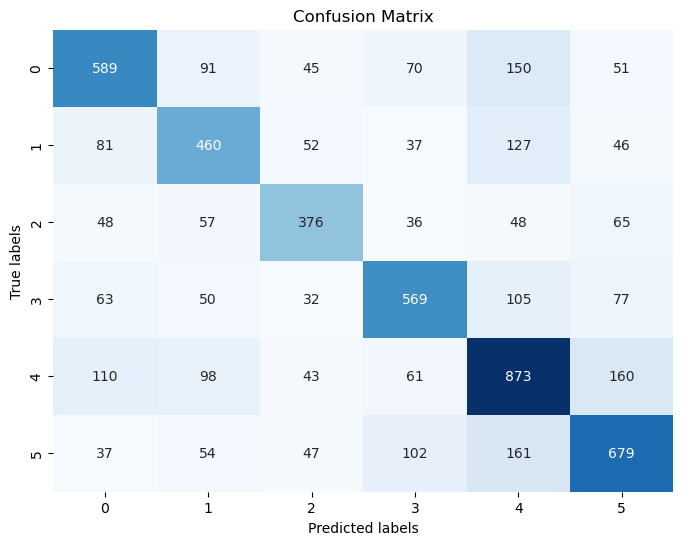

In [23]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix")
plt.show()

After finding the best hyperparameters of our model, we can try using ensemble methods to see if we can furher increase our results.

### Voting Classifier

In [31]:
log_clf = LogisticRegression(random_state=42, C=6.810594364990655, solver ='liblinear', penalty='l2')
lgb_clf = lgb.LGBMClassifier(objective='multiclass', num_class=6,
                             metric='multi_logloss', random_state=42, learning_rate=0.16688427557504074, max_depth=10,
                            min_child_samples=12, n_estimators=676, num_leaves=121)

voting_clf = VotingClassifier(estimators=[('lr', log_clf), ('lgbm', lgb_clf)],voting='soft')

voting_clf.fit(X_train, y_train)

train_acc = voting_clf.score(X_train, y_train)
val_acc = voting_clf.score(X_val, y_val)
test_acc = voting_clf.score(X_test, y_test)
y_pred = voting_clf.predict(X_test)
print(f"- Training accuracy: {train_acc:.2f} | Validation accuracy: {val_acc:.2f} | Testing accuracy: {test_acc:.2f}")
print(classification_report(y_test, y_pred))

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.712297 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 391680
[LightGBM] [Info] Number of data points in the train set: 45948, number of used features: 1536
[LightGBM] [Info] Start training from score -1.753207
[LightGBM] [Info] Start training from score -1.969027
[LightGBM] [Info] Start training from score -2.211097
[LightGBM] [Info] Start training from score -1.860258
[LightGBM] [Info] Start training from score -1.452140
[LightGBM] [Info] Start training from score -1.671802
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGB

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
VotingClassifier
- Training accuracy: 1.00 | Validation accuracy: 0.62 | Testing accuracy: 0.62
    

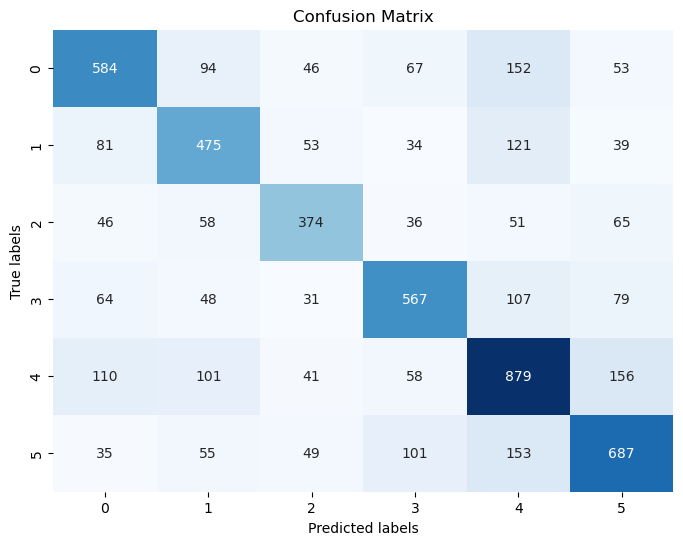

In [33]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix")
plt.show()

We will keep as our final class model, a Voting Classifier that consists of a Logistic Regression model and an LGBM Classifier, achieving **62%** accuracy.

**Save final class model**

In [35]:
# save class model with fitted data
model_class_filename = 'models/voting_clf_lr_lgbm_class_model.pkl'
joblib.dump(voting_clf, model_class_filename)

['models/voting_clf_lr_lgbm_class_model.pkl']

In [36]:
# Run only this cell to load the model
model_filename = 'models/voting_clf_lr_lgbm_class_model.pkl'

# load the model in order to not repeat the same process
class_model = joblib.load(model_filename)
class_model

VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=6.810594364990655,
                                                 random_state=42,
                                                 solver='liblinear')),
                             ('lgbm',
                              LGBMClassifier(learning_rate=0.16688427557504074,
                                             max_depth=10,
                                             metric='multi_logloss',
                                             min_child_samples=12,
                                             n_estimators=676, num_class=6,
                                             num_leaves=121,
                                             objective='multiclass',
                                             random_state=42))],
                 voting='soft')

## Section Division level

We apply the same steps like the Class level

In [39]:
#convert into array of lists the embeddings for training,validation and testing dataset
X_train = np.array([np.array(embedding) for embedding in df_train["Embedding"]])
y_train = np.array(df_train["Section/Division_Mapped"])

X_val = np.array([np.array(embedding) for embedding in df_val["Embedding"]])
y_val = np.array(df_val["Section/Division_Mapped"])

X_test = np.array([np.array(embedding) for embedding in df_test["Embedding"]])
y_test = np.array(df_test["Section/Division_Mapped"])

In [51]:
metrics_training = {}
metrics_validation ={}
metrics_testing = {}

estimators = [LogisticRegression(random_state=42,n_jobs=-1),
              RandomForestClassifier(random_state=42,n_jobs=-1),
              SGDClassifier(random_state=42,n_jobs=-1),
              xgb.XGBClassifier(random_state=42,n_jobs=-1),
              lgb.LGBMClassifier(random_state=42,n_jobs=-1),
              GaussianNB(),
              ]

for estimator in estimators:
    print('Processing estimator: ', estimator)
    print('\n')

    tic = time()
    
    
    #training
    estimator.fit(X_train, y_train)
    
        
    training_predictions = estimator.predict(X_train)
    
    print('Training Accuracy: ', round(accuracy_score(y_train, training_predictions),2))
    print('\n')

    toc = time()
    
    metrics_training[str(estimator).split('(')[0]] = {
    'accuracy':round(accuracy_score(y_train, training_predictions),2),
    'macro f1':round(f1_score(y_train, training_predictions, average='macro'),2),
    'recall':round(recall_score(y_train, training_predictions,average='macro'),2),
    'fit time(sec)':round(toc - tic,2)
    }

    #validation
    validation_predictions = estimator.predict(X_val)
        
    print('Validation Accuracy: ',round(accuracy_score(y_val, validation_predictions),2))
    print('\n')

    metrics_validation[str(estimator).split('(')[0]] = {
    'accuracy':round(accuracy_score(y_val, validation_predictions),2),
    'macro f1':round(f1_score(y_val, validation_predictions, average='macro'),2),
    'recall':round(recall_score(y_val, validation_predictions,average='macro'),2)}

    #testing
    predictions = estimator.predict(X_test)
    
    print('Testing Accuracy: ',round(accuracy_score(y_test, predictions),2))
    print('\n')
    
    metrics_testing[str(estimator).split('(')[0]] = {
        'accuracy':round(accuracy_score(y_test, predictions),2),
        'macro f1':round(f1_score(y_test, predictions, average='macro'),2),
        'recall':round(recall_score(y_test, predictions,average='macro'),2)}
    
metrics_training = pd.DataFrame(metrics_training)
metrics_validation = pd.DataFrame(metrics_validation)
metrics_testing = pd.DataFrame(metrics_testing)

Processing estimator:  LogisticRegression(n_jobs=-1, random_state=42)


Training Accuracy:  0.53


Validation Accuracy:  0.48


Testing Accuracy:  0.48


Processing estimator:  RandomForestClassifier(n_jobs=-1, random_state=42)


Training Accuracy:  1.0


Validation Accuracy:  0.35


Testing Accuracy:  0.34


Processing estimator:  SGDClassifier(n_jobs=-1, random_state=42)


Training Accuracy:  0.5


Validation Accuracy:  0.45


Testing Accuracy:  0.45


Processing estimator:  XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None,

In [52]:
metrics_training

,LogisticRegression,RandomForestClassifier,SGDClassifier,XGBClassifier,LGBMClassifier,GaussianNB
accuracy,0.53,1.00,0.50,1.00,0.98,0.41
macro f1,0.49,1.00,0.46,1.00,0.99,0.39
recall,0.46,1.00,0.46,1.00,0.99,0.48
fit time(sec),94.66,90.08,8.51,1911.35,825.80,23.71


In [56]:
metrics_validation

,LogisticRegression,RandomForestClassifier,SGDClassifier,XGBClassifier,LGBMClassifier,GaussianNB
accuracy,0.48,0.35,0.45,0.44,0.44,0.39
macro f1,0.42,0.21,0.38,0.37,0.37,0.37
recall,0.40,0.19,0.38,0.33,0.34,0.45


In [57]:
metrics_testing

,LogisticRegression,RandomForestClassifier,SGDClassifier,XGBClassifier,LGBMClassifier,GaussianNB
accuracy,0.48,0.34,0.45,0.45,0.45,0.38
macro f1,0.42,0.22,0.39,0.39,0.37,0.37
recall,0.40,0.19,0.38,0.35,0.34,0.44


Based on these results, Logistic Regression performs better among all the Classifiers

For this model, we will use a GridSearch to find the best hyperparameters

### Logistic Regression

### Hyperparameter tuning using Grid Search

In [53]:
log_reg = LogisticRegression()

#hyperparameters
param_grid = {
    'solver': ['liblinear', 'newton-cg', 'lbfgs'],
    'C': [0.01, 0.1, 1, 10, 30], 
}

grid_search = GridSearchCV(estimator=log_reg, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

Fitting 5 folds for each of 15 candidates, totalling 75 fits
Best Parameters: {'C': 10, 'solver': 'liblinear'}
Best Accuracy: 0.48689827727266755


In [24]:
log_clf = LogisticRegression(random_state=42, C=10, solver ='liblinear')
log_clf.fit(X_train, y_train)

train_acc = log_clf.score(X_train, y_train)
val_acc = log_clf.score(X_val, y_val)
test_acc = log_clf.score(X_test, y_test)
y_pred = log_clf.predict(X_test)

print(f"- Training accuracy: {train_acc:.2f} | Validation accuracy: {val_acc:.2f} | Testing accuracy: {test_acc:.2f}")
print(classification_report(y_test, y_pred))

- Training accuracy: 0.58 | Validation accuracy: 0.48 | Testing accuracy: 0.49
              precision    recall  f1-score   support

           0       0.50      0.49      0.49       138
           1       0.54      0.68      0.60       137
           2       0.54      0.62      0.58       472
           3       0.68      0.57      0.62       181
           4       0.55      0.55      0.55       464
           5       0.25      0.12      0.17        73
           6       0.46      0.42      0.44       227
           7       0.36      0.23      0.28       158
           8       0.46      0.58      0.52       909
           9       0.41      0.48      0.44       294
          10       0.55      0.55      0.55       436
          11       0.59      0.32      0.42        50
          12       0.65      0.43      0.52       102
          13       0.45      0.43      0.44       453
          14       0.59      0.38      0.47       104
          15       0.43      0.30      0.35        20
  

### Bagging Classifier

Similarly to the class model, we can again try using ensemble methods to see if we can furher increase our results.

In [31]:
base_model = LogisticRegression(C=10, solver='liblinear')
bagging_clf = BaggingClassifier(base_model, n_estimators=50, random_state=42)

bagging_clf.fit(X_train, y_train)

y_pred = bagging_clf.predict(X_test)

train_acc = bagging_clf.score(X_train, y_train)
val_acc = bagging_clf.score(X_val, y_val)
test_acc = bagging_clf.score(X_test, y_test)

print(f"- Training accuracy: {train_acc:.2f} | Validation accuracy: {val_acc:.2f} | Testing accuracy: {test_acc:.2f}")
print(classification_report(y_test, y_pred))

- Training accuracy: 0.57 | Validation accuracy: 0.49 | Testing accuracy: 0.49
              precision    recall  f1-score   support

           0       0.52      0.49      0.50       138
           1       0.53      0.66      0.59       137
           2       0.54      0.62      0.58       472
           3       0.69      0.57      0.63       181
           4       0.55      0.56      0.55       464
           5       0.29      0.12      0.17        73
           6       0.47      0.42      0.44       227
           7       0.37      0.23      0.28       158
           8       0.46      0.58      0.51       909
           9       0.40      0.48      0.44       294
          10       0.56      0.55      0.55       436
          11       0.58      0.30      0.39        50
          12       0.66      0.42      0.51       102
          13       0.45      0.43      0.44       453
          14       0.60      0.38      0.47       104
          15       0.46      0.30      0.36        20
  

We observe a very slight increase in the precision, so we will keep the Bagging Classifier as our final model

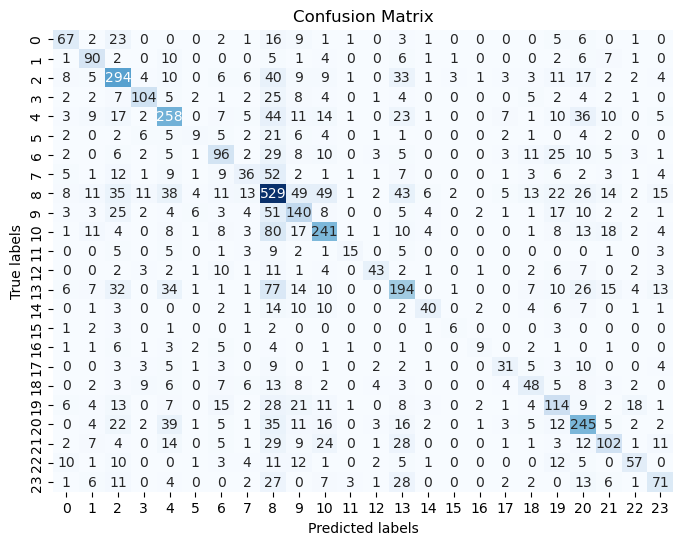

In [32]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix")
plt.show()

**Save final section model**

In [37]:
# save section model with fitted data
model_section_filename = 'models/bagging_classfiier_lr_section_model.pkl'
joblib.dump(bagging_clf, model_section_filename)

['models/bagging_classfiier_lr_section_model.pkl']

In [41]:
# load the model to avoid fitting time
model_section_filename = 'models/bagging_classfiier_lr_section_model.pkl'
section_model = joblib.load(model_section_filename)
section_model

BaggingClassifier(base_estimator=LogisticRegression(C=10, solver='liblinear'),
                  n_estimators=50, random_state=42)